## Modeling and Simulation in Python

Project 1

Manu Patil & Richard Gao

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
from pandas import read_csv
import numpy
import math

### What would be the impact on the U.S. population if the flu vaccination was never introduced?

There has been a growing population that believes that the flu vaccine has no effect in preventing the disease. With massive advances in sciences over the years, there is most likely a non-negligble effect of the vaccine. 

To further dive into this question, we will attempt to model the U.S. population with and without the influenza vaccine. In order to model this hypothetical situation we will look at the following parameters:

* number of people vaccinated over time
* birth rate
* death rate
    * due to influenza
    * excluding influenza
* rate of disease spread
* total population

### Basic Model Breakdown

Time unit = months
System(population, infected, number of people vaccinated, birth rate, death rate<sans influenza>, infection rate, disease death rate<flu effectiveness>)

State( pop, infected people, vaccinated people)
Vaccinated people = read in percentage data and apply to population


Pop = pop *birthrate –pop *death rate <sans influenza>

Without Vaccine Situation
	Infected [t+1] = infected[t] + infected * infection rate
	Killed by flu = Infected* Disease Death rate

With Vaccine situation
	Vaccinated = read in data
Infected [t+1] = infected[t] + infected * infection rate
Killed by Flu = Infected * (population – vaccinated people) * Disease Death rate.










### Read data in from csv

Using the read_csv function from pandas to parse and read in influenza data from the Center for Disease Control and Prevention database.

In [ ]:
csv = read_csv("2016- 2017.csv", encoding = "ISO-8859-1")

# Get the index of where each age group starts
for index, age_group in enumerate(csv.values[0]):
    if not isinstance(age_group, float):
        print(index, age_group)    

fields = ['Names', 'Aug', 'SAMPLE', 'Sep', 'SAMPLE']
df = read_csv('2016- 2017.csv', skipinitialspace=True, usecols=fields, skiprows=[0, 1], nrows=52, encoding = "ISO-8859-1")

print(df.SAMPLE)

In [14]:
system = System(initpopulation = 0, birth = 0, death = 0)
pops = State(vaccinated = 0, infected= 0, population =0)


,values
vaccinated,0
infected,0
population,0


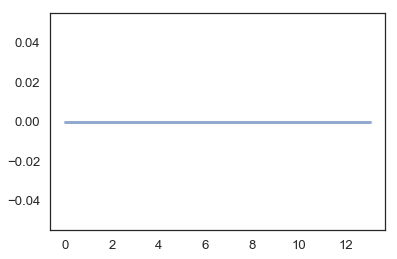

In [16]:
results = TimeSeries();
results[0]= system.initpopulation

for i in linspace(1,13,13):
    pops.population = pops.population + system.birth - system.death
    results[i] = pops.population
    deltavaccinated = pops.population * vaccinationPercent #Read in from csv
    pops.vaccinated = deltavaccinated
    
    
    deltainfected = pops.population * infection rate """ read in from csv""" + pops.vaccinated * vaccineeffectiverate """read in from csv"""
    
    pop.population = pops.poulation - deltavaccinated - deltainfected
plot(results);